In [1]:
import pandas as pd
import numpy as np

In [2]:
bc = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Regression\Logistic\BreastCancer.csv')

In [3]:
bc.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [4]:
bc.shape

(699, 12)

In [5]:
bc.isnull().sum()

Unnamed: 0          0
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [6]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       699 non-null    int64  
 1   Id               699 non-null    int64  
 2   Cl.thickness     699 non-null    int64  
 3   Cell.size        699 non-null    int64  
 4   Cell.shape       699 non-null    int64  
 5   Marg.adhesion    699 non-null    int64  
 6   Epith.c.size     699 non-null    int64  
 7   Bare.nuclei      683 non-null    float64
 8   Bl.cromatin      699 non-null    int64  
 9   Normal.nucleoli  699 non-null    int64  
 10  Mitoses          699 non-null    int64  
 11  Class            699 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 65.7+ KB


In [10]:
bc['Bare.nuclei'].value_counts()

1.0     418
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare.nuclei, dtype: int64

In [9]:
bc['Bare.nuclei'].fillna(1, inplace =True)

In [11]:
bc.isnull().sum()

Unnamed: 0         0
Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [13]:
bc.Class.replace({'benign': 0, 'malignant': 1}, inplace =True)

In [14]:
bc.Class.value_counts()

0    458
1    241
Name: Class, dtype: int64

In [15]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       699 non-null    int64  
 1   Id               699 non-null    int64  
 2   Cl.thickness     699 non-null    int64  
 3   Cell.size        699 non-null    int64  
 4   Cell.shape       699 non-null    int64  
 5   Marg.adhesion    699 non-null    int64  
 6   Epith.c.size     699 non-null    int64  
 7   Bare.nuclei      699 non-null    float64
 8   Bl.cromatin      699 non-null    int64  
 9   Normal.nucleoli  699 non-null    int64  
 10  Mitoses          699 non-null    int64  
 11  Class            699 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 65.7 KB


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
bc_train, bc_test = train_test_split(bc, test_size=.2)

In [18]:
bc.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,0
1,2,1002945,5,4,4,5,7,10.0,3,2,1,0
2,3,1015425,3,1,1,1,2,2.0,3,1,1,0
3,4,1016277,6,8,8,1,3,4.0,3,7,1,0
4,5,1017023,4,1,1,3,2,1.0,3,1,1,0


In [19]:
bc_train_x = bc_train.iloc[:, 2:11]
bc_train_y = bc_train.iloc[:, -1]

bc_test_x = bc_test.iloc[:,2:11]
bc_test_y = bc_test.iloc[:,-1]

In [21]:
bc_train_y.head()

241    0
655    0
123    1
458    0
68     1
Name: Class, dtype: int64

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg = LogisticRegression()

In [24]:
logreg.fit(bc_train_x, bc_train_y)

LogisticRegression()

In [25]:
pred_test = logreg.predict(bc_test_x)

In [26]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(bc_test_y, pred_test)

array([[89,  2],
       [ 3, 46]], dtype=int64)

In [29]:
tab1 = confusion_matrix(bc_test_y, pred_test)

In [30]:
Accuracy = tab1.diagonal().sum()*100/tab1.sum()
Accuracy

96.42857142857143

In [31]:
FPR = tab1[0,1]*100/tab1[0].sum()
FPR

2.197802197802198

In [33]:
from sklearn.metrics import recall_score

TPR = recall_score(bc_test_y, pred_test)*100
TPR

93.87755102040816

In [34]:
from sklearn.metrics import precision_score

Precision = precision_score(bc_test_y, pred_test)*100
Precision

95.83333333333334

In [35]:
pred_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import f1_score

F1 = f1_score(bc_test_y, pred_test)
F1

0.9484536082474228

In [37]:
pred_prob = logreg.predict_proba(bc_test_x)
pred_prob

array([[1.50394664e-06, 9.99998496e-01],
       [9.94181393e-01, 5.81860654e-03],
       [1.33481297e-02, 9.86651870e-01],
       [9.98133994e-01, 1.86600588e-03],
       [9.89534429e-01, 1.04655714e-02],
       [9.88307031e-01, 1.16929693e-02],
       [9.98784367e-01, 1.21563298e-03],
       [9.82568585e-01, 1.74314146e-02],
       [9.96601545e-01, 3.39845466e-03],
       [9.97469114e-01, 2.53088555e-03],
       [9.96601545e-01, 3.39845466e-03],
       [9.83812854e-01, 1.61871456e-02],
       [4.74365300e-02, 9.52563470e-01],
       [9.96239319e-01, 3.76068126e-03],
       [3.58261490e-04, 9.99641739e-01],
       [9.83068052e-01, 1.69319481e-02],
       [2.90413703e-06, 9.99997096e-01],
       [9.96198006e-01, 3.80199380e-03],
       [9.99038458e-01, 9.61542303e-04],
       [1.57030589e-02, 9.84296941e-01],
       [4.35363919e-04, 9.99564636e-01],
       [9.94989329e-01, 5.01067127e-03],
       [7.24380365e-05, 9.99927562e-01],
       [8.94362167e-01, 1.05637833e-01],
       [9.938925

In [39]:
pred_prob[:,1]

array([9.99998496e-01, 5.81860654e-03, 9.86651870e-01, 1.86600588e-03,
       1.04655714e-02, 1.16929693e-02, 1.21563298e-03, 1.74314146e-02,
       3.39845466e-03, 2.53088555e-03, 3.39845466e-03, 1.61871456e-02,
       9.52563470e-01, 3.76068126e-03, 9.99641739e-01, 1.69319481e-02,
       9.99997096e-01, 3.80199380e-03, 9.61542303e-04, 9.84296941e-01,
       9.99564636e-01, 5.01067127e-03, 9.99927562e-01, 1.05637833e-01,
       6.10740500e-03, 9.75563884e-01, 3.32821483e-03, 9.99936682e-01,
       3.80199380e-03, 1.93195084e-02, 9.96659789e-01, 1.59926991e-03,
       9.79326167e-01, 9.92294949e-01, 2.73521929e-02, 1.53800276e-03,
       5.20214422e-03, 1.93105705e-02, 3.39887279e-02, 9.99814848e-01,
       3.32821483e-03, 9.99993198e-01, 3.03761609e-03, 9.04796132e-04,
       9.99748378e-01, 2.15626651e-02, 9.95141821e-01, 6.31170363e-03,
       1.04606859e-02, 1.09879146e-03, 9.97513648e-01, 9.97593915e-01,
       9.99999597e-01, 1.09879146e-03, 5.64329583e-03, 9.81884239e-04,
      

In [40]:
from sklearn.metrics import roc_auc_score,roc_curve

In [41]:
roc_auc_score(bc_test_y, pred_prob[:,1])
# area under roc curve

0.9968602825745683

In [42]:
fpr,tpr, threshold = roc_curve(bc_test_y, pred_prob[:,1])

In [43]:
import matplotlib.pyplot as plt

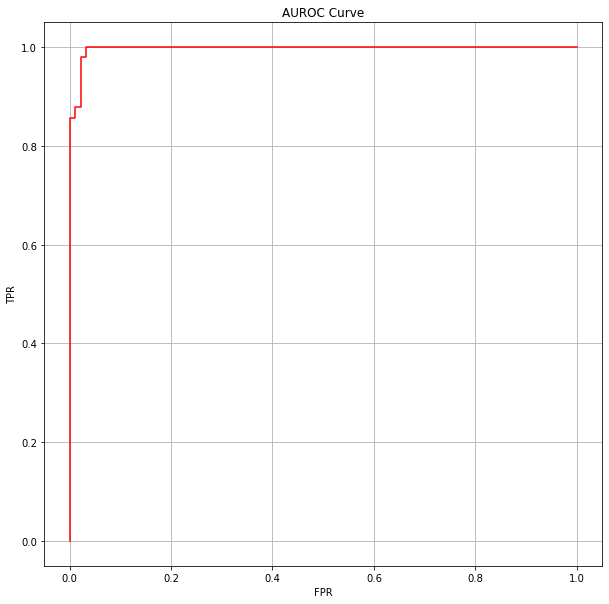

In [44]:
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color= 'r')
plt.title('AUROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

In [49]:
pred_prob_full = logreg.predict_proba(bc.iloc[:, 2:11])

In [50]:
pred_prob_full

array([[0.98068943, 0.01931057],
       [0.10226826, 0.89773174],
       [0.99095199, 0.00904801],
       ...,
       [0.01334813, 0.98665187],
       [0.04218418, 0.95781582],
       [0.01883805, 0.98116195]])

In [51]:
pred_prob_full = pd.DataFrame(pred_prob_full)

In [52]:
pred_prob_full

,0,1
0,0.980689,0.019311
1,0.102268,0.897732
2,0.990952,0.009048
3,0.296445,0.703555
4,0.984047,0.015953
...,...,...
694,0.996645,0.003355
695,0.998901,0.001099
696,0.013348,0.986652
697,0.042184,0.957816
